In [3]:
import rmgpy.molecule.resonance as resonance
import rmgpy.molecule as molecule
from IPython.display import display
import rmgpy.chemkin as chemkin


smiles = 'C=[C]C(=O)O[O]'
mol = molecule.Molecule(SMILES=smiles)

def generateResonanceStructures(mol, clarStructures=True, keepIsomorphic=False, filterStructures=True):

    molList = [mol]

    # Analyze molecule
    features = resonance.analyzeMolecule(mol)

    # Use generateAromaticResonanceStructures to check for false positives and negatives
    if features['isAromatic'] or (features['isCyclic'] and features['isRadical'] and not features['isArylRadical']):
        newMolList = generateAromaticResonanceStructures(mol, features)
        if len(newMolList) == 0:
            # Encountered false positive, ie. the molecule is not actually aromatic
            features['isAromatic'] = False
            features['isPolycyclicAromatic'] = False
    else:
        newMolList = []

    # Generate remaining resonance structures
    methodList = resonance.populateResonanceAlgorithms(features)
    print "methodList: ", methodList, "\n"
    list1 = _generateResonanceStructures(molList, methodList, keepIsomorphic)

    #if filterStructures:
     #   return resonance.filterResonanceStructures(molList)
    #else:
    return molList, list1
    
def _generateResonanceStructures(molList, methodList, keepIsomorphic=False, copy=False):
    if copy:
        # Make a copy of the list so we don't modify the input list
        molList = molList[:]

    # Iterate over resonance isomers
    index = 0
    while index < len(molList) and index < 100:
        molecule = molList[index]
        newMolList = []

        for method in methodList:
            newMolList.extend(method(molecule))
            #print method

        for newMol in newMolList:
             #Append to isomer list if unique
            for mol in molList:
                if not keepIsomorphic and mol.isIsomorphic(newMol):
                    break
            else:
                molList.append(newMol)
                #print "extended ", newMol

        # Move to next resonance isomer
        index += 1

    return molList



molList, list1 = generateResonanceStructures(mol)

print "len(molList) = {0}, len(list1) = {1}".format(len(molList), len(list1))

for mol in molList:
    mol.updateAtomTypes(logSpecies=False)

ERROR:root:Could not update atomtypes for <Molecule "C#[S]">.
multiplicity 2
1 C u0 p1 c-1 {2,T}
2 S u1 p0 c+2 {1,T}



methodList:  [<cyfunction generateAdjacentResonanceStructures at 0x7f51a7da8c50>, <cyfunction generateLonePairRadicalResonanceStructures at 0x7f51a7da8d10>, <cyfunction generateLonePairMultipleBondResonanceStructures at 0x7f51a7da8dd0>] 

len(molList) = 1, len(list1) = 1


AtomTypeError: Unable to determine atom type for atom S.++, which has 0 single bonds, 0 double bonds to C, 0 double bonds to O, 0 double bonds to S, 1 triple bonds, 0 benzene bonds, 0 lone pairs, and 2 charge.

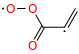

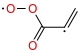

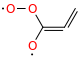

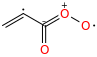

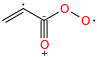

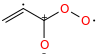

******


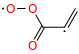

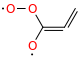

In [1]:
import rmgpy.molecule.resonance as resonance
import rmgpy.molecule as molecule
from IPython.display import display
import rmgpy.chemkin as chemkin


smiles = 'C=[C]C(=O)O[O]'
mol = molecule.Molecule(SMILES=smiles)
display(mol)
molList = [mol]
molList += resonance.generateAdjacentResonanceStructures(mol)
molList += resonance.generateLonePairRadicalResonanceStructures(mol)
molList += resonance.generateLonePairMultipleBondResonanceStructures(mol)


for mol in molList:
    display(mol)
        
filteredList = resonance.filterResonanceStructures(molList)

print '******'

for mol in filteredList:
    display(mol)

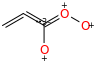

ERROR:root:Could not update atomtypes for <Molecule "C=C=[C](O)=OO">.
multiplicity 3
1 C u2 p0 c-3 {3,D} {4,D} {5,S}
2 C u0 p0 c0 {3,D} {6,S} {7,S}
3 C u0 p0 c0 {1,D} {2,D}
4 O u0 p1 c+1 {1,D} {8,S}
5 O u0 p2 c+1 {1,S}
6 H u0 p0 c0 {2,S}
7 H u0 p0 c0 {2,S}
8 O u0 p2 c+1 {4,S}



Cdc
Cd
Cdd
O4dc
O2sn
H
H
O2sp


AtomTypeError: Unable to determine atom type for atom C..---, which has 1 single bonds, 1 double bonds to C, 1 double bonds to O, 0 double bonds to S, 0 triple bonds, 0 benzene bonds, 0 lone pairs, and -3 charge.

In [2]:
#for mol in list1:
#    display(mol)
display(list1[32])
for atom in list1[32].atoms:
    print atom.atomType.label
list1[32].updateAtomTypes()

In [3]:
from rmgpy.exceptions import AtomTypeError

isomers = []
for mol in list1:
    try:
        mol.updateAtomTypes(logSpecies=False)
    except AtomTypeError:
        pass  # Don't append resonance structure if it creates an undefined atomType
    else:
        isomers.append(mol)

In [4]:
len(isomers)

89